In [9]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

filename = list(uploaded.keys())[0]


data = pd.read_csv(io.BytesIO(uploaded[filename]))

print("Dataset Info:")
data.info()

print("\nSample of the Dataset:")
print(data.head())

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   

In [10]:
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())

data.dropna(inplace=True)

print("\nAfter Removing Missing Values:")
print(data.info())


Missing Values in the Dataset:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

After Removing Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            70

In [13]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = data.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
  label_encoders[col] = LabelEncoder()
  data[col] = label_encoders[col].fit_transform(data[col])

  print("\nSample of Encoded Data:")
  print(data.head())




Sample of Encoded Data:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0        5375  Female              0     Yes         No       1           No   
1        3962    Male              0      No         No      34          Yes   
2        2564    Male              0      No         No       2          Yes   
3        5535    Male              0      No         No      45           No   
4        6511  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMo

In [14]:
X = data.drop('Churn', axis=1)
y = data['Churn']

print("\nFeatures and Target Variable Prepared:")
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)


Features and Target Variable Prepared:
Features Shape: (7043, 20)
Target Shape: (7043,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("\nTraining and Testing Data Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Training and Testing Data Shapes:
X_train: (5634, 20)
X_test: (1409, 20)
y_train: (5634,)
y_test: (1409,)


In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

print("Model Training Complete!")

Model Training Complete!


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
y_pred = logreg.predict(X_test)

y_pred_proba = logreg.predict_proba(X_test)[:, 1]

print("\nPredictions on Test Set:")
print(y_pred[:10])


Predictions on Test Set:
[1 0 0 1 0 0 0 0 0 0]


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Model Evaluation Metrics:
Accuracy: 0.81
Precision: 0.69
Recall: 0.55
F1-Score: 0.61
ROC AUC: 0.86


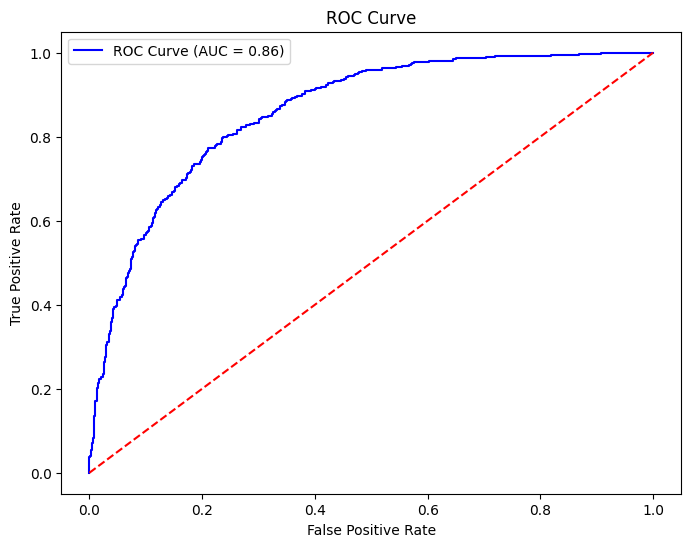

In [23]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest Model Training Complete!")

Random Forest Model Training Complete!


In [25]:
y_pred_rf = rf_model.predict(X_test)

y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("\nPredictions on Test Set (Random Forest):")
print(y_pred_rf[:10])


Predictions on Test Set (Random Forest):
[1 0 0 1 0 0 0 0 0 1]


In [26]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_score(y_test, y_pred_proba_rf)

print("\nRandom Forest Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.2f}")


Random Forest Model Evaluation Metrics:
Accuracy: 0.80
Precision: 0.66
Recall: 0.48
F1 Score: 0.56
ROC AUC Score: 0.84



Top Feature by Importance:
           Feature  Importance
5           tenure    0.154153
18  MonthlyCharges    0.142098
19    TotalCharges    0.135083
0       customerID    0.130084
15        Contract    0.082277


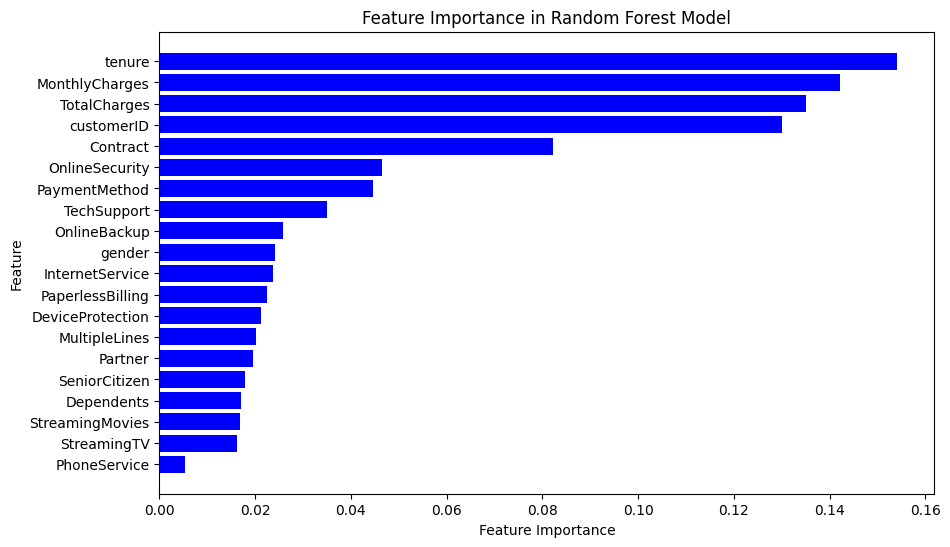

In [27]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nTop Feature by Importance:")
print(feature_importance_df.head())

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [25, 10],
    'min_samples_leaf': [12, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters Found by GridSearchCV:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters Found by GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [30]:
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)
y_pred_proba_tuned = best_rf_model.predict_proba(X_test)[:, 1]

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print("\nTuned Random Forest Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print(f"F1 Score: {f1_tuned:.2f}")
print(f"ROC AUC Score: {roc_auc_tuned:.2f}")



Tuned Random Forest Model Evaluation Metrics:
Accuracy: 0.81
Precision: 0.69
Recall: 0.51
F1 Score: 0.59
ROC AUC Score: 0.86


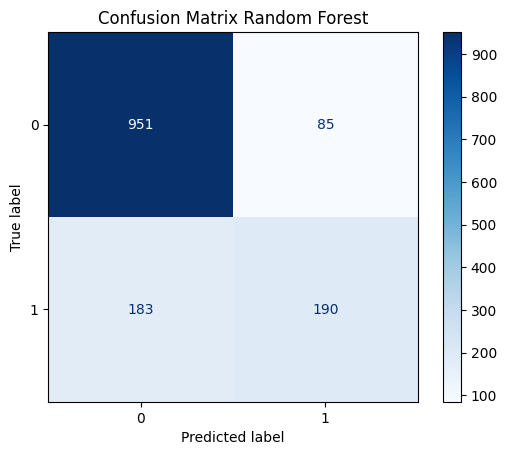

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.show()

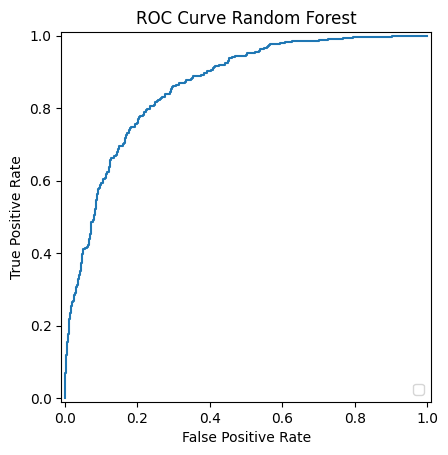

In [32]:
from sklearn.metrics import roc_curve, RocCurveDisplay

fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_pred_proba_tuned)
roc_display = RocCurveDisplay(fpr=fpr_tuned, tpr=tpr_tuned)
roc_display.plot()
plt.title('ROC Curve Random Forest')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

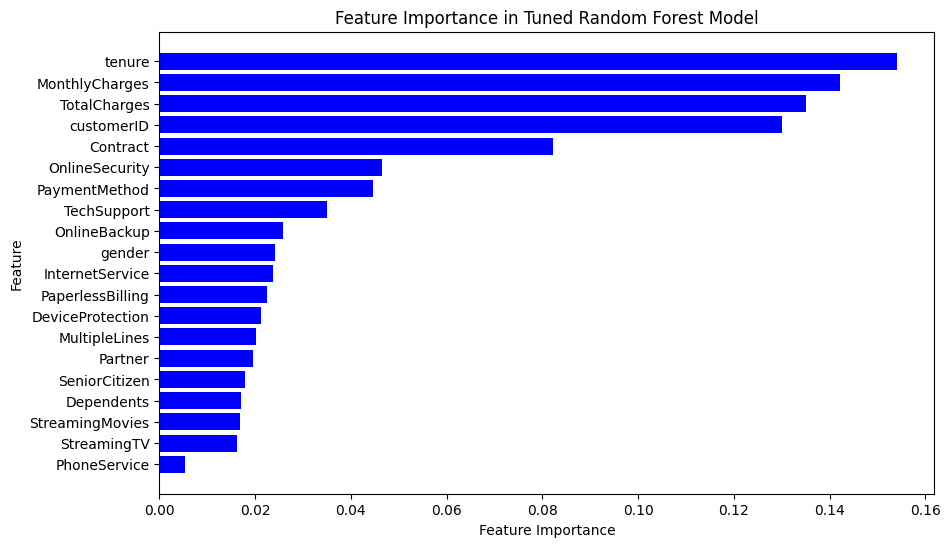

In [33]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Tuned Random Forest Model')
plt.gca().invert_yaxis()
plt